In [18]:
# 1️⃣ Imports
import pandas as pd
import joblib
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# 2️⃣ Load cleaned data + vectorizer
df = pd.read_csv("../data/reviews_cleaned.csv")
tfidf = joblib.load("../data/tfidf.pkl")

X = df["reviewText"]
y = df["sentiment"]

# 3️⃣ Train-test split (ONLY ONCE)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

X_train_tfidf = tfidf.transform(X_train)
X_test_tfidf = tfidf.transform(X_test)


In [6]:
df.columns


Index(['reviewText', 'overall', 'sentiment', 'overall_sentiment'], dtype='object')

In [7]:
# Drop neutral reviews (overall = 3)
df = df[df['overall'] != 3]

# Create sentiment label
df['overall_sentiment'] = df['overall'].apply(lambda x: 'positive' if x > 3 else 'negative')

df['overall_sentiment'].value_counts()


overall_sentiment
positive    402340
negative     57428
Name: count, dtype: int64

In [8]:
from sklearn.model_selection import train_test_split

X = df['reviewText']
y = df['overall_sentiment']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

len(X_train), len(X_test)


(367814, 91954)

In [9]:
tfidf = TfidfVectorizer(
    max_features=5000,
    ngram_range=(1,2),
    stop_words='english'
)

X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)


In [10]:
model = LogisticRegression(max_iter=200)
model.fit(X_train_tfidf, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,200
,multi_class,'deprecated'


In [11]:
y_pred = model.predict(X_test_tfidf)


In [12]:
accuracy = accuracy_score(y_test, y_pred)
accuracy


0.9412858603214651

In [13]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

    negative       0.85      0.65      0.73     11486
    positive       0.95      0.98      0.97     80468

    accuracy                           0.94     91954
   macro avg       0.90      0.82      0.85     91954
weighted avg       0.94      0.94      0.94     91954



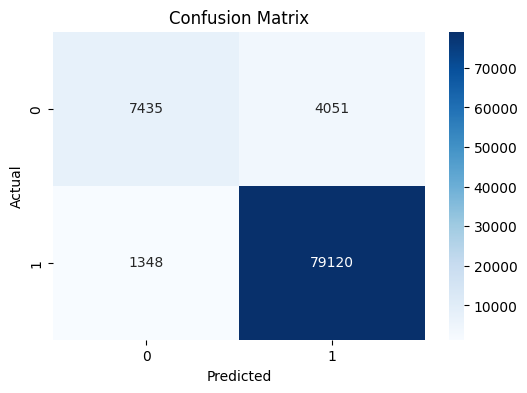

In [14]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [19]:
rf = RandomForestClassifier(
    n_estimators=100,       
    max_depth=20,            
    n_jobs=-1,
    random_state=42
)

rf.fit(X_train_tfidf, y_train)
rf_pred = rf.predict(X_test_tfidf)
rf_acc = accuracy_score(y_test, rf_pred)

print("Random Forest Accuracy:", rf_acc)


Random Forest Accuracy: 0.8754485938621485


In [20]:
xgb = XGBClassifier(
    n_estimators=150,
    max_depth=6,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric="logloss",
    n_jobs=-1,
    random_state=42
)

xgb.fit(X_train_tfidf, y_train)
xgb_pred = xgb.predict(X_test_tfidf)
xgb_acc = accuracy_score(y_test, xgb_pred)

print("XGBoost Accuracy:", xgb_acc)


XGBoost Accuracy: 0.9206886051721513


In [23]:
lgb = LGBMClassifier(
    n_estimators=200,
    num_leaves=31,
    max_depth=15,
    learning_rate=0.1,
    n_jobs=-1,
    random_state=42
)

lgb.fit(X_train_tfidf, y_train)
lgb_pred = lgb.predict(X_test_tfidf)
lgb_acc = accuracy_score(y_test, lgb_pred)

print("LightGBM Accuracy:", lgb_acc)


[LightGBM] [Info] Number of positive: 321872, number of negative: 45942
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 3.529442 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 995784
[LightGBM] [Info] Number of data points in the train set: 367814, number of used features: 19539
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.875094 -> initscore=1.946774
[LightGBM] [Info] Start training from score 1.946774
LightGBM Accuracy: 0.9324662331165583


C:\Users\1296290\telco_env\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


In [24]:
results = pd.DataFrame({
    "Model": ["Random Forest", "XGBoost", "LightGBM"],
    "Accuracy": [rf_acc, xgb_acc, lgb_acc]
}).sort_values("Accuracy", ascending=False)

results

,Model,Accuracy
2,LightGBM,0.932466
1,XGBoost,0.920689
0,Random Forest,0.875449


In [25]:
import os

os.makedirs("../models", exist_ok=True)


In [26]:
import joblib

joblib.dump(rf, "../models/rf_model.pkl")
joblib.dump(xgb, "../models/xgb_model.pkl")
joblib.dump(lgb, "../models/lgb_model.pkl")

print("Models saved successfully")


Models saved successfully


In [27]:
import pandas as pd
import joblib

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier


In [28]:
# Load cleaned data
df = pd.read_csv("../data/reviews_cleaned.csv")

# Load TF-IDF vectorizer
tfidf = joblib.load("../data/tfidf.pkl")

X = df["reviewText"]
y = df["sentiment"]

# Train-test split (YES, this is NORMAL and REQUIRED)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

X_train_tfidf = tfidf.transform(X_train)
X_test_tfidf = tfidf.transform(X_test)


In [30]:
joblib.dump(rf, "../models/random_forest.pkl")
joblib.dump(xgb, "../models/xgboost.pkl")
joblib.dump(lgb, "../models/lightgbm.pkl")


['../models/lightgbm.pkl']

In [31]:
import joblib

# choose the best model you trained
best_model = xgb   # or lgb

joblib.dump(best_model, "../models/best_model.pkl")
joblib.dump(tfidf, "../models/tfidf.pkl")

print("Model & TF-IDF saved successfully")


Model & TF-IDF saved successfully


In [32]:
import pandas as pd
import joblib
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# Load data + TF-IDF
df = pd.read_csv("../data/reviews_cleaned.csv")
tfidf = joblib.load("../data/tfidf.pkl")

X = df["reviewText"]
y = df["sentiment"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

X_train_tfidf = tfidf.transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Random Forest
rf = RandomForestClassifier(n_estimators=200, n_jobs=-1)
rf.fit(X_train_tfidf, y_train)
joblib.dump(rf, "../models/rf.pkl")

# XGBoost
xgb = XGBClassifier(eval_metric="logloss")
xgb.fit(X_train_tfidf, y_train)
joblib.dump(xgb, "../models/xgb.pkl")

# LightGBM
lgb = LGBMClassifier()
lgb.fit(X_train_tfidf, y_train)
joblib.dump(lgb, "../models/lgb.pkl")

print("Models saved")


[LightGBM] [Info] Number of positive: 321872, number of negative: 45942
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 4.592150 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 996170
[LightGBM] [Info] Number of data points in the train set: 367814, number of used features: 19533
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.875094 -> initscore=1.946774
[LightGBM] [Info] Start training from score 1.946774
Models saved
